# Dev Process

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
num_dev = 3
dim_dev = 3
err_stand_dev = 0.02

import gen_synthetic as gs
X_dev, Y_dev = gs.gen_linear_synthetic(num_dev, dim_dev, err_stand_dev)
print '\nX is: \n', X_dev
print '\nY is: \n', Y_dev

X has been generated.
W has been generated.
Y has been generated.

X is: 
[[ 0.87905051  1.94999385 -1.14081585]
 [-0.01677889 -0.04724947  2.4991287 ]
 [ 1.93195057 -0.4271941  -1.15197552]]

Y is: 
[[ 1.]
 [-1.]
 [ 1.]]


### Partition Dataset 

Use the `gen_linear_synthetic` method to all the observing data first. And then, partition them into three categories as: **training, validation** and **test**.

In [3]:
# Generate the whole observed data
num_data = 1000
dim_data = 10
err_stand = 0.001

num_train = int(num_data * 0.7)
num_val = int(num_data * 0.15)

X, Y = gs.gen_linear_synthetic(num_data, dim_data, err_stand)

# Partition data into 'train, validation, test' parts.
# Here we use 'np.random.permutation' to track shuffled 
# indices. Because the random impact will act on both X
# and Y, instead of using 'np.random.shuffle(x)' directly.
shuffledIndx = np.random.permutation(num_data)
X_train = X[shuffledIndx[: num_train]]
Y_train = Y[shuffledIndx[: num_train]]
X_val = X[shuffledIndx[num_train : num_train + num_val]]
Y_val = Y[shuffledIndx[num_train : num_train + num_val]]
X_test = X[shuffledIndx[num_train + num_val :]]
Y_test = Y[shuffledIndx[num_train + num_val :]]

print 'X_train shape: ', X_train.shape
print 'Y_train shape: ', Y_train.shape
print 'X_val shape: ', X_val.shape
print 'Y_val shape: ', Y_val.shape
print 'X_test shape: ', X_test.shape
print 'Y_test shape: ', Y_test.shape

X has been generated.
W has been generated.
Y has been generated.
X_train shape:  (700L, 10L)
Y_train shape:  (700L, 1L)
X_val shape:  (150L, 10L)
Y_val shape:  (150L, 1L)
X_test shape:  (150L, 10L)
Y_test shape:  (150L, 1L)


In [4]:
# [Terence]
# You can't directly import things from a folder,
# unless you use '__init__.py' to tell Python 
# interpreter that this folder should be treated
# like a Python package.
from classifiers import KNearestNeighbor

knn = KNearestNeighbor()
knn.train(X_train, Y_train)

Y_pred = knn.predict(X_val, k=3)
val_acc = np.mean(Y_pred == Y_val)
print 'val_acc = ', val_acc

Y_pred = knn.predict(X_test, k=3)
val_acc = np.mean(Y_pred == Y_test)
print 'val_acc = ', val_acc

val_acc =  0.500533333333
val_acc =  0.507822222222


# Problems in Assignment

### Question 1 & 2
Why is it suitable to choose odd-$k$?

Generate $n=1000$ points with $p=10$ and $sigma=0.001$. For different values of $k$, ranging from 1 to 50 (in increments of 5), plot the cross-validation train-error and test-error. What can you say about the effect of $k$? What is the optimal value of $k$, which you can infer from the plot? How does performance changes when you move from smaller values of $k$ to larger values?

### [Terence Comments]
Generally, we do **NOT** need to use the *cross-validation* as long as the validation dataset is large enough.

But when the validation dataset is *not large enough* to **express all the characteristics of the dataset**, we need to use the cross-validation to go through the whole training dataset to explore all the characteristics of our dataset.

Specifically, assume we want to determine $K$ different values for one hyperparameter, and use $N$ folder cross-validation. For each hyperparameter, we need to run $N$ times cross validation. In total, we'll run $K \times N$ times iterations.

In [5]:
# Generate training, testing dataset.
num_train = int(0.8 * num_data)
shuffledIndx = np.random.permutation(num_data)

X_train = X[shuffledIndx[: num_train]]
Y_train = Y[shuffledIndx[: num_train]]
X_test = X[shuffledIndx[num_train :]]
Y_test = Y[shuffledIndx[num_train :]]

# Prepare values of hyperparameter.
k_hypers = range(1, 50, 5)
num_folds = 10

# Prepare training folder dataset.
X_train_folds = np.array_split(X_train, num_folds)
Y_train_folds = np.array_split(Y_train, num_folds)

k_to_accuracies = {}

for k_val in k_hypers:
    accuracies = []
    
    for i in xrange(num_folds):
        trainIndx = [x for x in xrange(num_folds) if x != i]
        X_train_fold = np.concatenate([X_train_folds[j] for j in trainIndx])
        Y_train_fold = np.concatenate([Y_train_folds[j] for j in trainIndx])
        
        X_val_fold = X_train_folds[i]
        Y_val_fold = Y_train_folds[i]
        
        knn = KNearestNeighbor()
        knn.train(X_train_fold, Y_train_fold)
        Y_pre_fold = knn.predict(X_val_fold, k=k_val)
        
        accuracies.append(np.mean(Y_pre_fold == Y_val_fold))
        
    k_to_accuracies[k_val] = accuracies    

# Output the results
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print 'k = %d, accuracy = %f' % (k, accuracy)

k = 1, accuracy = 0.520000
k = 1, accuracy = 0.518750
k = 1, accuracy = 0.501875
k = 1, accuracy = 0.500000
k = 1, accuracy = 0.502812
k = 1, accuracy = 0.490625
k = 1, accuracy = 0.499688
k = 1, accuracy = 0.510938
k = 1, accuracy = 0.510938
k = 1, accuracy = 0.504687
k = 6, accuracy = 0.505000
k = 6, accuracy = 0.509375
k = 6, accuracy = 0.500313
k = 6, accuracy = 0.500000
k = 6, accuracy = 0.500000
k = 6, accuracy = 0.496250
k = 6, accuracy = 0.499063
k = 6, accuracy = 0.519687
k = 6, accuracy = 0.500000
k = 6, accuracy = 0.504687
k = 11, accuracy = 0.525000
k = 11, accuracy = 0.525000
k = 11, accuracy = 0.501563
k = 11, accuracy = 0.500000
k = 11, accuracy = 0.507500
k = 11, accuracy = 0.492500
k = 11, accuracy = 0.501563
k = 11, accuracy = 0.504375
k = 11, accuracy = 0.506250
k = 11, accuracy = 0.511250
k = 16, accuracy = 0.522500
k = 16, accuracy = 0.521875
k = 16, accuracy = 0.501875
k = 16, accuracy = 0.500000
k = 16, accuracy = 0.507500
k = 16, accuracy = 0.497188
k = 16, accu

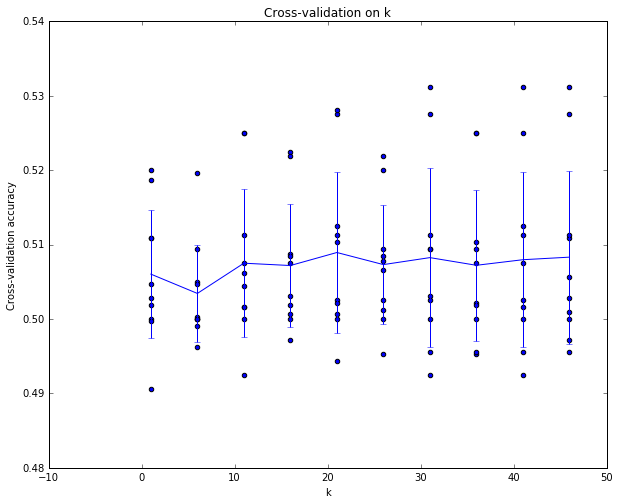

In [6]:
# plot the raw observations
for k in k_hypers:
    accuracies = k_to_accuracies[k]
    # [Terence]
    #     - Here the '[k] * len(accuracies)' will generate the 'x' list.
    #     - Then, 'accuracies' is the 'y' list. 
    # Above two lists must have the same size.
    #
    # So, the below code will generate all points of accuracies under
    # the same value 'k'.
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])

plt.errorbar(k_hypers, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

plt.show()

In [7]:
[5] * 4

[5, 5, 5, 5]

### Question 3
Generate $n=400$ points with $sigma=0.001$. Vary $p$ in range of $2$ to $50$. Run $k$-NN with $k=9$. Plot the cross-validation test-error and comment about effect of dimensionality on the algorithm.

### Question 4
Generate $n=1000$ points with $sigma=0.001$ and $p=10$. Run $k$-NN with $k=9$. Vary the $N$ for $N$-fold validation from $2$ to $10$ and plot the cross-validation test error. What do you observe from the plot?

### Question 5
On the given **iris** dataset, plot with varying $K=1,3,5,7$, the $N$-fold cross-validation test-error.